In [3]:
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageOps
import PIL
import torch, torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from ansim_dataset200 import ansimDataset, create_circular_mask
# from convolution_lstm import encoderConvLSTM, decoderConvLSTM
from ConvLSTM200 import MtConvLSTM
import random
import math
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torchvision import datasets, models, transforms
import time
import os
import cv2

In [19]:
dir1 = '/home/rliu/ansim/results/test_4-25_mt-6-8-10-12_predict40/'
dir2 = '/home/rliu/ansim/results/test_4-28_mt-paper_predict40/'
predict_steps = 30

In [45]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [73]:
folder_num1 = len(next(os.walk(dir1))[1])
psnr_sum_1 = []
for i in range(predict_steps):
    psnr_step = 0
    for j in range(1,folder_num1+1):
        original = cv2.imread(dir1 + '%0.4d/target/target%0.4d.png'% (j,i))
        contrast = cv2.imread(dir1 + '%0.4d/predicted/predicted%0.4d.png'% (j,i),1)
        d=psnr(original,contrast)
        psnr_step += d
    psnr_step = psnr_step / folder_num1
    psnr_sum_1.append(psnr_step)
    
folder_num2 = len(next(os.walk(dir2))[1])
psnr_sum_2 = []
for i in range(predict_steps):
    psnr_step = 0
    for j in range(1,folder_num2+1):
        original = cv2.imread(dir2 + '%0.4d/target/target%0.4d.png'% (j,i))
        contrast = cv2.imread(dir2 + '%0.4d/predicted/predicted%0.4d.png'% (j,i),1)
        d=psnr(original,contrast)
        psnr_step += d
    psnr_step = psnr_step / folder_num2
    psnr_sum_2.append(psnr_step)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


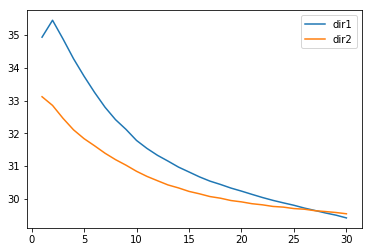

In [81]:
plt.plot(np.arange(1, predict_steps+1), psnr_sum_1, label='dir1')
plt.plot(np.arange(1, predict_steps+1), psnr_sum_2, label='dir2')
plt.legend()